<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [180]:
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [117]:
delta = 3
div =225
beta = 0.95

In [118]:
z = stats.norm.ppf((1+beta)/2)
z

1.959963984540054

In [119]:
n = round(z**2 * div / beta**2)
n

958

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [120]:
n = 25
x_mean = 130
sd = 15
conf = 0.98
sem = sd / n**0.5

In [121]:
h = sem * stats.t.ppf((1+conf)/2, n)

In [122]:
interval = [x_mean - h, x_mean + h]
interval

[122.54467847376807, 137.45532152623193]

In [123]:
L = round(interval[1] - interval[0])
L

15

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [124]:
import numpy as np

In [136]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170Задания для самостоятельного решения


#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия
alpha = 0.001

In [137]:
t, p_value = stats.ttest_ind(mens, womens)

In [138]:
if p_value > alpha:
    print(f"Различия незначительны, p_value = {p_value:.4f}")
else:
    print(f"Различия значимы, p_value = {p_value:.4f}")

Различия значимы, p_value = 0.0002


(array([3.0000e+00, 1.1000e+01, 5.0000e+01, 1.3000e+02, 3.9200e+02,
        8.8000e+02, 2.0060e+03, 3.8910e+03, 6.9940e+03, 1.0830e+04,
        1.5273e+04, 1.8787e+04, 2.0337e+04, 1.9964e+04, 1.7262e+04,
        1.3184e+04, 9.1370e+03, 5.5330e+03, 2.9950e+03, 1.3980e+03,
        6.3400e+02, 2.1300e+02, 6.8000e+01, 2.5000e+01, 3.0000e+00]),
 array([-271.38859664, -236.8555874 , -202.32257816, -167.78956892,
        -133.25655968,  -98.72355044,  -64.1905412 ,  -29.65753196,
           4.87547728,   39.40848652,   73.94149577,  108.47450501,
         143.00751425,  177.54052349,  212.07353273,  246.60654197,
         281.13955121,  315.67256045,  350.20556969,  384.73857893,
         419.27158817,  453.80459741,  488.33760666,  522.8706159 ,
         557.40362514,  591.93663438]),
 <BarContainer object of 25 artists>)

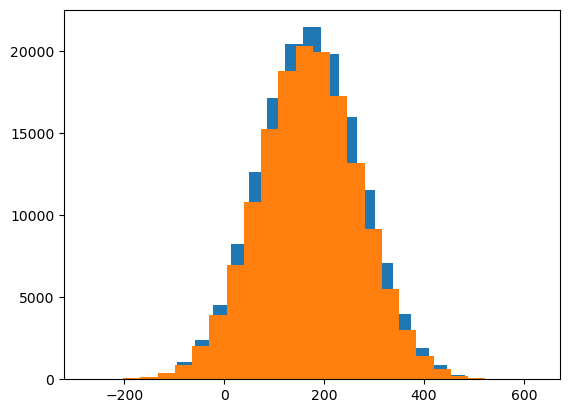

In [165]:
plt.hist(mens, bins = 25)
plt.hist(womens, bins = 25)

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [71]:
sd = 150
beta = 0.95
delta = 50

In [72]:
z = stats.norm.ppf((1+beta)/2)
z

1.959963984540054

In [73]:
n = round((z * sd / beta)**2)
n

95770

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [75]:
import pandas as pd

In [76]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [80]:
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations.values)

In [83]:
alpha = 0.05
if pvalue > alpha:
    print("Принимаем нулевую гипотезу, эффект отсутствует")
else:
    print(f"На уровне значимости {alpha} есть наблюдаемый эффект, нулевую гипотезу отклоняем")

Принимаем нулевую гипотезу, эффект отсутствует


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [84]:
def mean_confidence_interval(data, confidence=0.95):  
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  
    return m-h, m, m+h 

In [85]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
mean_confidence_interval(data, 0.9)



(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [110]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
alpha = 0.05

In [111]:
int1 = mean_confidence_interval(A, 1-alpha)
int2 = mean_confidence_interval(B, 1-alpha)

In [112]:
int1, int2

((6.194065759237698, 6.446428571428571, 6.698791383619445),
 (3.8548051152869576, 4.147368421052631, 4.439931726818305))

In [129]:
#доверительные интервалы не пересекаются
len(A), len(B)

(112, 95)

In [130]:
t, pvalue = stats.ttest_ind(A,B, equal_var=False)
pvalue

1.3216865332483675e-24

In [132]:
if pvalue > alpha:
    print("Различия незначимы")
else:
    print("Разлиия значимы")

Разлиия значимы


(array([ 2.,  8., 22.,  0., 28., 20.,  0.,  9.,  4.,  2.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

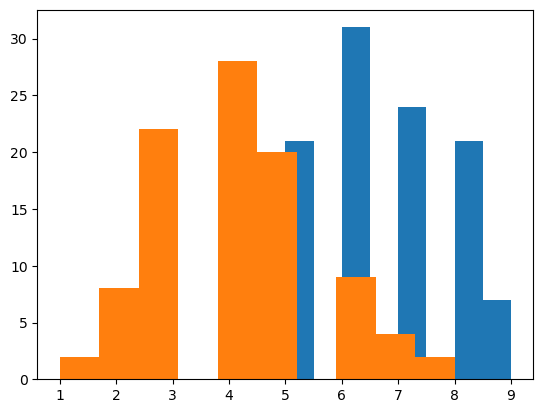

In [166]:
plt.hist(A)
plt.hist(B)

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [167]:
# При alpha = 0.05 нулевая гипотеза отклоняется, распределение ненормальное

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [173]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)
alpha = 0.05

In [174]:
t, p_value = stats.ttest_ind(A,B)

In [175]:
p_value

0.051284593140469285

In [176]:
if p_value > alpha:
    print(f"Различия незначительны, p_value = {p_value:.4f}")
else:
    print(f"Различия значимы, p_value = {p_value:.4f}")

Различия незначительны, p_value = 0.0513


In [178]:
# при альфа 0,052 различия могли бы считаться значимыми или p-value 0,049

<AxesSubplot:ylabel='Count'>

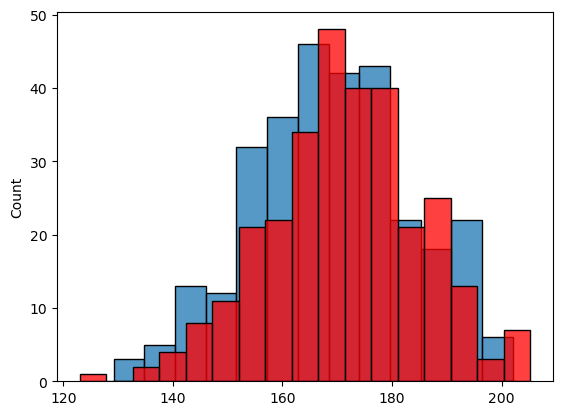

In [188]:
sns.histplot(A)
sns.histplot(B, color = 'r')